Complete the exercises below For **Assignment #6**.

Import the following items,
- `pandas as pd`,
- `LinearRegression` from the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module,
- `make_column_transformer` from [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose),
- `OneHotEncoder` from [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing),
- `make_pipeline` from the [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) module, and,
- everything from the [plotnine]() package.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from plotnine import *

## Read in our data for this exercise

Use `pd.read_csv` to read in data from the following URL: http://bit.ly/2IgDF0E. Capture the data into a dataframe called `df_voles`.

❗️Hint: just like in `R` we can read data directly from a URL.

In [2]:
df_voles = pd.read_csv("http://bit.ly/2IgDF0E")

Preview the data with the `.head()` method.

The data contains the variables:

- `site` for the id of each random study site (each case or row is a survey/trapping site)
- `voles` for the vole count at each site
- `veg` for the percent cover of vegetation at each site
- `soil` identifying a site as “moist” or “dry”

In [3]:
df_voles.head()

,site,voles,veg,soil
0,1,17,4,moist
1,2,30,33,moist
2,3,54,94,moist
3,4,49,64,moist
4,5,34,32,moist


## EDA

Let's make a few figures from `df_voles` using `ggplot` from **Plotnine**.

In the cell below plot the `voles` variable (y-axis) versus the `veg` variable and color points by the `soil` variable.

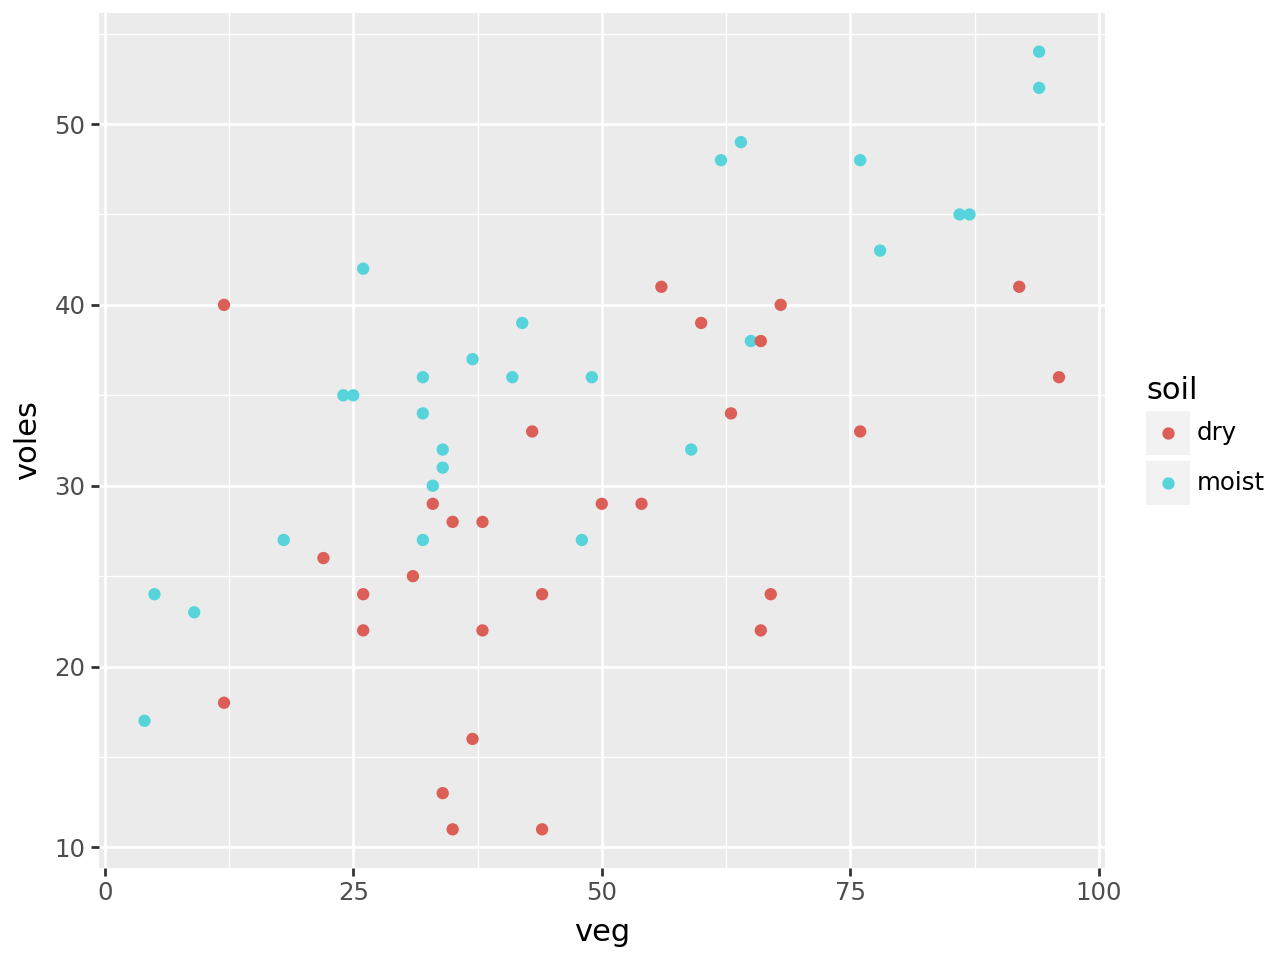

In [4]:
ggplot(df_voles, aes(x = 'veg', y = 'voles' , color = 'soil')) + geom_point()

## Modeling

In the cell below, model `voles` with `soil` and `veg` as predictors in a parallel slopes model. 

Here are the steps I would take:
1. Make a column transformer with `make_column_transformer` that transforms `soil` with `OneHotEncoder(drop="first")` and passes 'veg' through untransformed.
2. Create a pipeline with `make_pipeline` using the column transformer from above and `LinearRegression()` as my model. 
3. Get the `X` (training data) and `y` predictor from `df_voles`
4. Use the `.fit()` method for the pipeline to train the model with `X` and `y`. 

In [5]:
ct = make_column_transformer(
    ['passthrough', ['veg']],
    [OneHotEncoder(drop="first"), ['soil']]
)

In [6]:
outcome = 'voles'
X, y = df_voles.loc[:, df_voles.columns != outcome], df_voles[outcome]

In [7]:
X.head()

,site,veg,soil
0,1,4,moist
1,2,33,moist
2,3,94,moist
3,4,64,moist
4,5,32,moist


In [8]:
ct.fit_transform(X)

array([[ 4.,  1.],
       [33.,  1.],
       [94.,  1.],
       [64.,  1.],
       [32.,  1.],
       [76.,  1.],
       [59.,  1.],
       [78.,  1.],
       [65.,  1.],
       [34.,  1.],
       [87.,  1.],
       [32.,  1.],
       [42.,  1.],
       [ 9.,  1.],
       [ 5.,  1.],
       [25.,  1.],
       [86.,  1.],
       [49.,  1.],
       [41.,  1.],
       [48.,  1.],
       [18.,  1.],
       [34.,  1.],
       [32.,  1.],
       [62.,  1.],
       [24.,  1.],
       [26.,  1.],
       [94.,  1.],
       [37.,  1.],
       [43.,  0.],
       [26.,  0.],
       [66.,  0.],
       [56.,  0.],
       [31.,  0.],
       [35.,  0.],
       [34.,  0.],
       [54.,  0.],
       [92.,  0.],
       [63.,  0.],
       [60.,  0.],
       [37.,  0.],
       [35.,  0.],
       [12.,  0.],
       [12.,  0.],
       [44.,  0.],
       [76.,  0.],
       [44.,  0.],
       [38.,  0.],
       [38.,  0.],
       [67.,  0.],
       [22.,  0.],
       [33.,  0.],
       [66.,  0.],
       [26.,

In [9]:
pl = make_pipeline(
    ct,
    LinearRegression()
)

pl.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  ['veg']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['soil'])])),
                ('linearregression', LinearRegression())])

Use the function below to get the parameter values for your model from above.

In [10]:
def get_regression_table(pipeline):
    terms=list(pipeline['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(
        term=terms, 
        estimate=estimates,
    )
    return pd.DataFrame(data)

In [11]:
df_voles_w_pred = (
    df_voles.assign(pred_voles=lambda df_: pl.predict(df_)))

In [12]:
df_voles_w_pred.head()

,site,voles,veg,soil,pred_voles
0,1,17,4,moist,25.600600
1,2,30,33,moist,33.113599
2,3,54,94,moist,48.916804
3,4,49,64,moist,41.144736
4,5,34,32,moist,32.854530


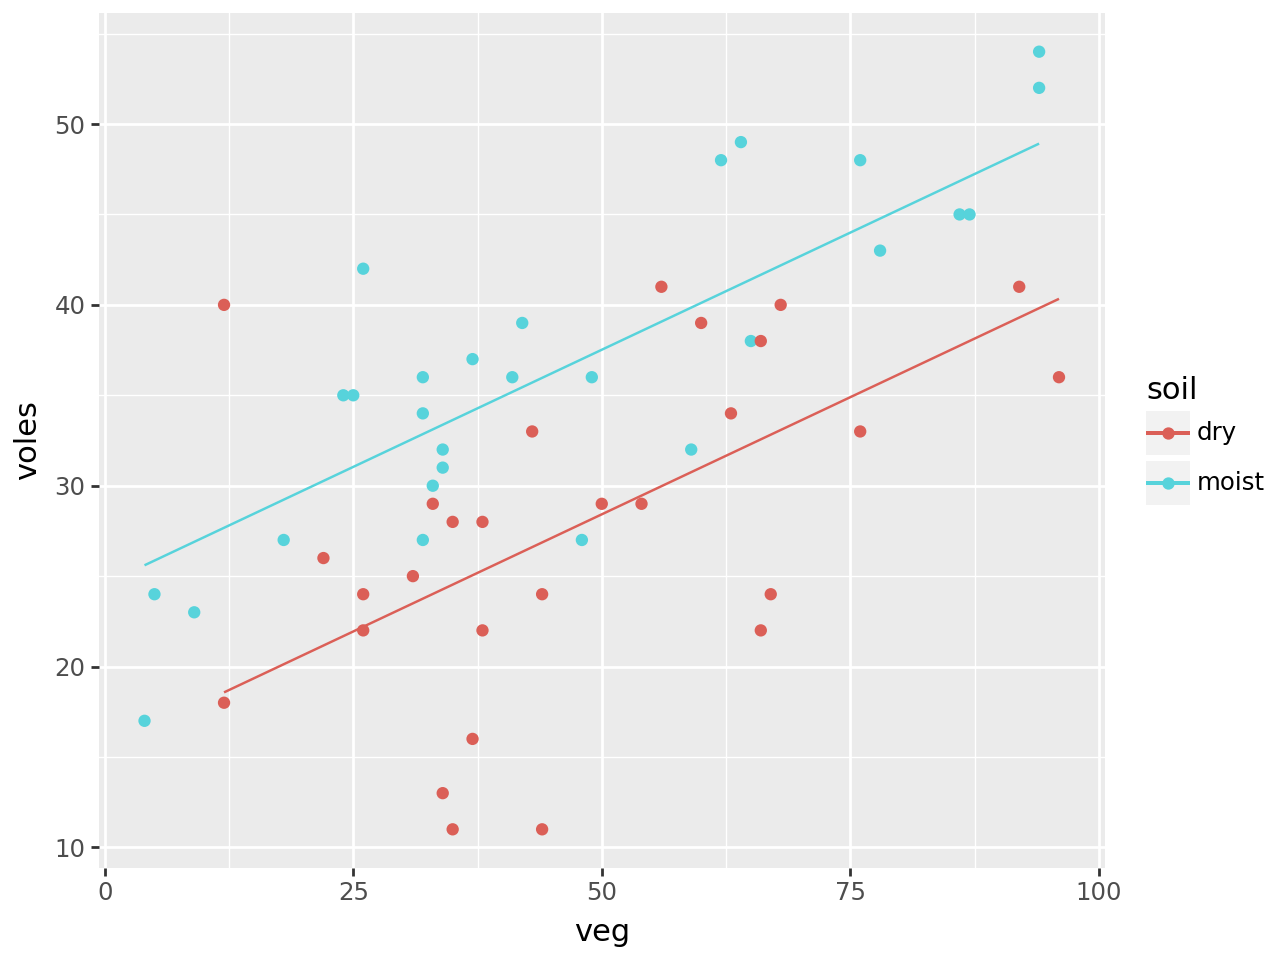

In [14]:
ggplot(df_voles_w_pred, aes(x = 'veg', y = 'voles' , color = 'soil')) + \
    geom_point() + \
    geom_line(mapping = aes(y = 'pred_voles'))

In [15]:
get_regression_table(pl)

,term,estimate
0,passthrough__veg,0.259069
1,onehotencoder__soil_moist,9.100298
2,intercept,15.464026


❓Would protecting a site with high vegetation cover be a more effective way to preserve the vole population than a site with low vegetation cover? Why?

(**Hint:** use your chart above to answer. It's also possible to leverage your regression parameters if you chose to model `voles` with a parallel slopes model.)

**Answer:**

Yes, the slope of the regression lines (in the parallel slopes model) is positive (0.2591). And also if we just purely look at the dots on the scatterplot (without even plotting the regression lines), it's clearly visible that there is a positive relationship between vegetation cover and vole population (and I would call the relationship to be somewhat linear). Therefore protecting a site with high vegetation cover would be a more effective way to preserve the vole population than protecting a site with low vegetation cover.

❓Dry sites typically cost a lot less to purchase and maintain for conservation organizations. Thus, if a conservation organization decides to purchase a few dry sites, roughly what percent cover of vegetation do they need to maintain on these sites (at a minimum) to support a population of about 30 voles at the site?

(**Hint:** In your chart above, draw a line at voles = 30 using `geom_hline` and make a rough estimate for this answer...)

**Answer:**

Looking at the below chart, the regression line of the dry soil type in the parallel slope model scatterplot crosses the horizontal line drawn at 30 voles at a vegetation cover of approximately 56%. As a result, the conservation organizations would need to maintain at least a 56% vegetation cover on the dry sites to support a population of about 30 voles at the site.
Below that 56% vegetation cover, the vast majority of the dry sites had a vole count of less than 30. Above the 56% vegetation cover there were only 2 dry sites in the example with a vole count below 30 whereas the vole count on the remaining 8 sites (with at least 56% vegetation cover) usually had a vole count that was significantly above 30.

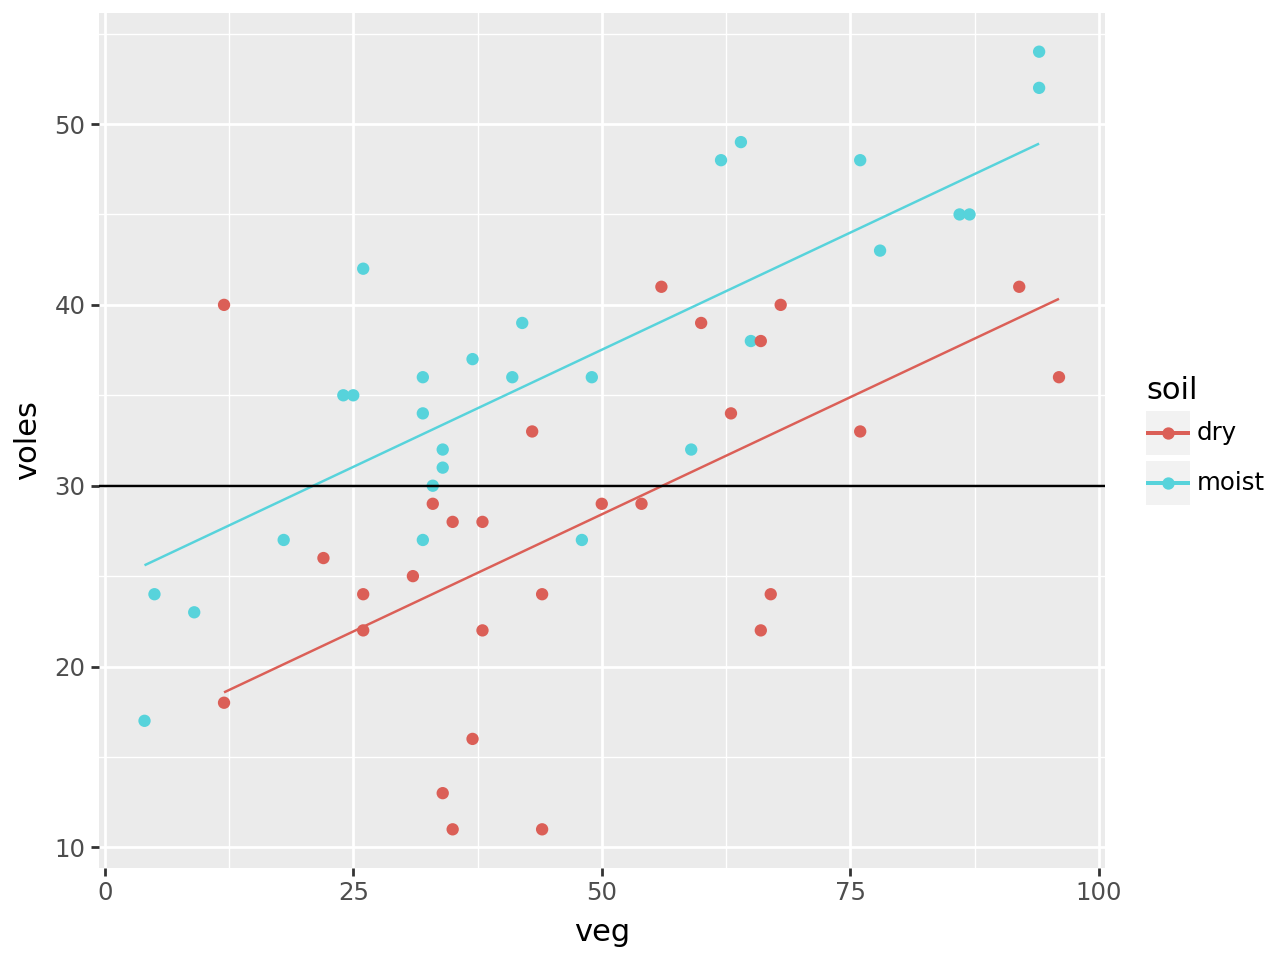

In [17]:
ggplot(df_voles_w_pred, aes(x = 'veg', y = 'voles' , color = 'soil')) + \
    geom_point() + \
    geom_line(mapping = aes(y = 'pred_voles')) + \
    geom_hline(yintercept=30)

❓The Nature Conservancy is looking at purchasing a site for this species (in the same study area) that has moist soil and 40% vegetation cover. Using the regression equation what would you predict as the possible vole population the site might be able to support?

(**Hint:** Use `.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))` with yout pipeline.)

**Answer:**

A site with moist soil and 40% vegetation cover would be able to support a vole population of approximately 35. This is the result of the code below, and we can also see from the above chart that the y (voles) coordinate of the regression line of the moist soil type in the parallel slopes model is approximately 35 at a vegetation cover (x coordinate) of 40%.

In [18]:
pl.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))

array([34.92708151])